In [1]:
"""DataFrame."""

'DataFrame.'

# Преобразование датафрейма

In [ ]:
import io
import os
from typing import Union, cast

import numpy as np
import pandas as pd
import requests

# pylint: disable=too-many-lines

## Изменение датафрейма

Вернемся к датафрейму из предыдущего занятия

In [ ]:
# fmt: off
# создадим несколько списков и массивов Numpy с информацией о семи странах мира
country = np.array(
    [
        "China",
        "Vietnam",
        "United Kingdom",
        "Russia",
        "Argentina",
        "Bolivia",
        "South Africa",
    ]
)
capital = np.array(
    [
        "Beijing",
        "Hanoi", 
        "London", 
        "Moscow", 
        "Buenos Aires", 
        "Sucre", 
        "Pretoria"
    ]
)
population = np.array([1400, 97, 67, 144, 45, 12, 59])  # млн. человек
area = np.array([9.6, 0.3, 0.2, 17.1, 2.8, 1.1, 1.2])  # млн. кв. км.
sea = np.array([1] * 5 + [0, 1])  # выход к морю (в этом списке его нет только у Боливии)

# кроме того создадим список кодов стран, которые станут индексом датафрейма
custom_index = ["CN", "VN", "GB", "RU", "AR", "BO", "ZA"]

# создадим пустой словарь
countries_dict = {}

# превратим эти списки в значения словаря,
# одновременно снабдив необходимыми ключами
countries_dict["country"] = country
countries_dict["capital"] = capital
countries_dict["population"] = population
countries_dict["area"] = area
countries_dict["sea"] = sea

# создадим датафрейм
countries = pd.DataFrame(countries_dict, index=custom_index)
countries
# fmt: on

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


### Копирование датафрейма

#### Метод `.copy()`

In [4]:
# поместим датафрейм в новую переменную
countries_new = countries

In [5]:
# удалим запись про Аргентину и сохраним результат
countries_new.drop(labels="AR", axis=0, inplace=True)

# выведем исходный датафрейм
countries

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


In [6]:
# в первую очередь вернем Аргентину в исходный датафрейм countries
countries = pd.DataFrame(countries_dict, index=custom_index)

# создадим копию, на этот раз с помощью метода .copy()
countries_new = countries.copy()

# вновь удалим запись про Аргентину
countries_new.drop(labels="AR", axis=0, inplace=True)

# выведем исходный датафрейм
countries

,country,capital,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


#### Про параметр `inplace`

In [7]:
# создадим несложный датафрейм
df = pd.DataFrame([[1, 1, 1], [2, 2, 2], [3, 3, 3]], columns=["A", "B", "C"])

df

,A,B,C
0,1,1,1
1,2,2,2
2,3,3,3


In [8]:
# если метод выдает датафрейм, изменение не сохраняется
df.drop(labels=["A"], axis=1)

,B,C
0,1,1
1,2,2
2,3,3


In [9]:
# проверим это
df

,A,B,C
0,1,1,1
1,2,2,2
2,3,3,3


In [10]:
# если метод выдает None, изменение постоянно
print(df.drop(labels=["A"], axis=1, inplace=True))

None


In [11]:
# проверим
df

,B,C
0,1,1
1,2,2
2,3,3


In [12]:
# по этой причине нельзя использовать inplace = True
# и записывать в переменную одновременно
df.drop(labels=["B"], axis=1, inplace=True)

# в этом случае мы записываем None в переменную df
print(df)

   C
0  1
1  2
2  3


### Столбцы датафрейма

Именование столбцов при создании датафрейма

In [13]:
# создадим список с названиями столбцов на кириллице
custom_columns = ["страна", "столица", "население", "площадь", "море"]

# и транспонированный массив Numpy с данными о странах
arr = np.array([country, capital, population, area, sea]).T
arr

array([['China', 'Beijing', '1400', '9.6', '1'],
       ['Vietnam', 'Hanoi', '97', '0.3', '1'],
       ['United Kingdom', 'London', '67', '0.2', '1'],
       ['Russia', 'Moscow', '144', '17.1', '1'],
       ['Argentina', 'Buenos Aires', '45', '2.8', '1'],
       ['Bolivia', 'Sucre', '12', '1.1', '0'],
       ['South Africa', 'Pretoria', '59', '1.2', '1']], dtype='<U32')

In [14]:
# создадим датафрейм, передав в параметр columns названия столбцов на кириллице
countries = pd.DataFrame(data=arr, index=custom_index, columns=custom_columns)

countries

,страна,столица,население,площадь,море
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


In [15]:
# вернем прежние названия столбцов
countries.columns = ["country", "capital", "population", "area", "sea"]

Переименование столбцов

In [16]:
# переименуем столбец capital на city
countries.rename(columns={"capital": "city"}, inplace=True)
countries

,country,city,population,area,sea
CN,China,Beijing,1400,9.6,1
VN,Vietnam,Hanoi,97,0.3,1
GB,United Kingdom,London,67,0.2,1
RU,Russia,Moscow,144,17.1,1
AR,Argentina,Buenos Aires,45,2.8,1
BO,Bolivia,Sucre,12,1.1,0
ZA,South Africa,Pretoria,59,1.2,1


### Тип данных в столбце

Просмотр типа данных в столбце

In [17]:
# в одном столбце содержится один тип данных
# посмотрим на тип данных каждого из столбцов
countries.dtypes

country       object
city          object
population    object
area          object
sea           object
dtype: object

Изменение типа данных

In [18]:
# преобразуем тип данных столбца population в int
countries.population = countries.population.astype("int")

In [19]:
# изменим тип данных в столбцах area и sea
countries = countries.astype({"area": "float", "sea": "category"})

In [20]:
# посмотрим на результат
countries.dtypes

country         object
city            object
population       int32
area           float64
sea           category
dtype: object

Тип данных category

In [21]:
# тип category похож на фактор в R
countries.sea

CN    1
VN    1
GB    1
RU    1
AR    1
BO    0
ZA    1
Name: sea, dtype: category
Categories (2, object): ['0', '1']

Фильтр столбцов по типу данных

In [22]:
# выберем только типы данных int и float
countries.select_dtypes(include=["int64", "float64"])

,area
CN,9.6
VN,0.3
GB,0.2
RU,17.1
AR,2.8
BO,1.1
ZA,1.2


In [23]:
# выберем все типы данных, кроме object и category
countries.select_dtypes(exclude=["object", "category"])

,population,area
CN,1400,9.6
VN,97,0.3
GB,67,0.2
RU,144,17.1
AR,45,2.8
BO,12,1.1
ZA,59,1.2


### Добавление строк и столбцов

#### Добавление строк

Метод ._append() + словарь

In [24]:
# создадим словарь с данными Канады и добавим его в датафрейм
dict_ = {
    "country": "Canada",
    "city": "Ottawa",
    "population": 38,
    "area": 10,
    "sea": "1",
}

# словарь можно добавлять только если ignore_index = True
# countries = countries._append(dict_, ignore_index=True)
countries = pd.concat([countries, pd.DataFrame([dict_])], ignore_index=True)
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.6,1
1,Vietnam,Hanoi,97,0.3,1
2,United Kingdom,London,67,0.2,1
3,Russia,Moscow,144,17.1,1
4,Argentina,Buenos Aires,45,2.8,1
5,Bolivia,Sucre,12,1.1,0
6,South Africa,Pretoria,59,1.2,1
7,Canada,Ottawa,38,10.0,1


Метод ._append() + другой датафрейм

In [25]:
# новая строка может также содержаться в другом датафрейме
# обратите внимание, что числовые значения мы помещаем в списки
peru = pd.DataFrame(
    {"country": "Peru", "city": "Lima", "population": [33], "area": [1.3], "sea": [1]}
)
peru

,country,city,population,area,sea
0,Peru,Lima,33,1.3,1


In [26]:
# перед добавлением выберем первую строку с помощью метода .iloc[]
# countries._append(peru.iloc[0], ignore_index=True)
countries = pd.concat([countries, peru.iloc[[0]]], ignore_index=True)

Использование `.iloc[]`

In [27]:
# ни Испания, ни Нидерланды, ни Перу не сохранились
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.6,1
1,Vietnam,Hanoi,97,0.3,1
2,United Kingdom,London,67,0.2,1
3,Russia,Moscow,144,17.1,1
4,Argentina,Buenos Aires,45,2.8,1
5,Bolivia,Sucre,12,1.1,0
6,South Africa,Pretoria,59,1.2,1
7,Canada,Ottawa,38,10.0,1
8,Peru,Lima,33,1.3,1


In [28]:
# добавим данные об этих странах на постоянной основе с помощью метода .iloc[]
countries.iloc[5:7] = pd.DataFrame(
    [
        ["Spain", "Madrid", 47, 0.5, 1],
        ["Netherlands", "Amsterdam", 17, 0.04, 1],
    ],
    columns=countries.columns,
    index=[5, 6],
)

# такой способ поместил строки на нужный нам индекс,
# заменив (!) существующие данные
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.60,1
1,Vietnam,Hanoi,97,0.30,1
2,United Kingdom,London,67,0.20,1
3,Russia,Moscow,144,17.10,1
4,Argentina,Buenos Aires,45,2.80,1
5,Spain,Madrid,47,0.50,1
6,Netherlands,Amsterdam,17,0.04,1
7,Canada,Ottawa,38,10.00,1
8,Peru,Lima,33,1.30,1


#### Добавление столбцов

Объявление нового столбца

In [29]:
# новый столбец датафрейма можно просто объявить
# и сразу добавить в него необходимые данные
# например, добавим данные о плотности населения
countries["pop_density"] = [153, 49, 281, 9, 17, 94, 508, 26] + [np.nan]
countries

,country,city,population,area,sea,pop_density
0,China,Beijing,1400,9.60,1,153.0
1,Vietnam,Hanoi,97,0.30,1,49.0
2,United Kingdom,London,67,0.20,1,281.0
3,Russia,Moscow,144,17.10,1,9.0
4,Argentina,Buenos Aires,45,2.80,1,17.0
5,Spain,Madrid,47,0.50,1,94.0
6,Netherlands,Amsterdam,17,0.04,1,508.0
7,Canada,Ottawa,38,10.00,1,26.0
8,Peru,Lima,33,1.30,1,NaN


In [30]:
# добавим столбец с кодами стран
countries.insert(
    loc=1,  # это будет второй по счету столбец
    column="code",  # название столбца
    value=["CN", "VN", "GB", "RU", "AR", "ES", "NL", "PE"] + [np.nan],
)  # значения столбца

In [31]:
# изменения сразу сохраняются в датафрейме
countries

,country,code,city,population,area,sea,pop_density
0,China,CN,Beijing,1400,9.60,1,153.0
1,Vietnam,VN,Hanoi,97,0.30,1,49.0
2,United Kingdom,GB,London,67,0.20,1,281.0
3,Russia,RU,Moscow,144,17.10,1,9.0
4,Argentina,AR,Buenos Aires,45,2.80,1,17.0
5,Spain,ES,Madrid,47,0.50,1,94.0
6,Netherlands,NL,Amsterdam,17,0.04,1,508.0
7,Canada,PE,Ottawa,38,10.00,1,26.0
8,Peru,NaN,Lima,33,1.30,1,NaN


Метод `.assign()`

In [32]:
# создадим столбец area_miles, переведя площадь в мили
countries = countries.assign(area_miles=countries.area / 2.59).round(2)
countries

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.60,1,153.0,3.71
1,Vietnam,VN,Hanoi,97,0.30,1,49.0,0.12
2,United Kingdom,GB,London,67,0.20,1,281.0,0.08
3,Russia,RU,Moscow,144,17.10,1,9.0,6.60
4,Argentina,AR,Buenos Aires,45,2.80,1,17.0,1.08
5,Spain,ES,Madrid,47,0.50,1,94.0,0.19
6,Netherlands,NL,Amsterdam,17,0.04,1,508.0,0.02
7,Canada,PE,Ottawa,38,10.00,1,26.0,3.86
8,Peru,NaN,Lima,33,1.30,1,NaN,0.50


In [33]:
# удалим этот столбец, чтобы рассмотреть другие методы
countries.drop(labels="area_miles", axis=1, inplace=True)

Можно проще

In [34]:
# объявим новый столбец и присвоим ему нужное нам значение
countries["area_miles"] = (countries.area / 2.59).round(2)
countries

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.60,1,153.0,3.71
1,Vietnam,VN,Hanoi,97,0.30,1,49.0,0.12
2,United Kingdom,GB,London,67,0.20,1,281.0,0.08
3,Russia,RU,Moscow,144,17.10,1,9.0,6.60
4,Argentina,AR,Buenos Aires,45,2.80,1,17.0,1.08
5,Spain,ES,Madrid,47,0.50,1,94.0,0.19
6,Netherlands,NL,Amsterdam,17,0.04,1,508.0,0.02
7,Canada,PE,Ottawa,38,10.00,1,26.0,3.86
8,Peru,NaN,Lima,33,1.30,1,NaN,0.50


### Удаление строк и столбцов

#### Удаление строк

In [35]:
# для удаления строк можно использовать метод .drop()
# с параметрами labels (индекс удаляемых строк) и axis = 0
countries.drop(labels=[0, 1], axis=0)

,country,code,city,population,area,sea,pop_density,area_miles
2,United Kingdom,GB,London,67,0.20,1,281.0,0.08
3,Russia,RU,Moscow,144,17.10,1,9.0,6.60
4,Argentina,AR,Buenos Aires,45,2.80,1,17.0,1.08
5,Spain,ES,Madrid,47,0.50,1,94.0,0.19
6,Netherlands,NL,Amsterdam,17,0.04,1,508.0,0.02
7,Canada,PE,Ottawa,38,10.00,1,26.0,3.86
8,Peru,NaN,Lima,33,1.30,1,NaN,0.50


In [36]:
# кроме того, можно использовать метод .drop() с единственным параметром index
countries.drop(index=[5, 7])

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.60,1,153.0,3.71
1,Vietnam,VN,Hanoi,97,0.30,1,49.0,0.12
2,United Kingdom,GB,London,67,0.20,1,281.0,0.08
3,Russia,RU,Moscow,144,17.10,1,9.0,6.60
4,Argentina,AR,Buenos Aires,45,2.80,1,17.0,1.08
6,Netherlands,NL,Amsterdam,17,0.04,1,508.0,0.02
8,Peru,NaN,Lima,33,1.30,1,NaN,0.50


In [37]:
# передадим индекс датафрейма через атрибут index и удалим четвертую строку
countries.drop(index=countries.index[4])

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.60,1,153.0,3.71
1,Vietnam,VN,Hanoi,97,0.30,1,49.0,0.12
2,United Kingdom,GB,London,67,0.20,1,281.0,0.08
3,Russia,RU,Moscow,144,17.10,1,9.0,6.60
5,Spain,ES,Madrid,47,0.50,1,94.0,0.19
6,Netherlands,NL,Amsterdam,17,0.04,1,508.0,0.02
7,Canada,PE,Ottawa,38,10.00,1,26.0,3.86
8,Peru,NaN,Lima,33,1.30,1,NaN,0.50


In [38]:
# с атрубутом датафрейма index мы можем делать срезы
# удалим каждую вторую строку, начиная с четвертой с конца
countries.drop(index=countries.index[-4::2])

,country,code,city,population,area,sea,pop_density,area_miles
0,China,CN,Beijing,1400,9.60,1,153.0,3.71
1,Vietnam,VN,Hanoi,97,0.30,1,49.0,0.12
2,United Kingdom,GB,London,67,0.20,1,281.0,0.08
3,Russia,RU,Moscow,144,17.10,1,9.0,6.60
4,Argentina,AR,Buenos Aires,45,2.80,1,17.0,1.08
6,Netherlands,NL,Amsterdam,17,0.04,1,508.0,0.02
8,Peru,NaN,Lima,33,1.30,1,NaN,0.50


#### Удаление столбцов

In [39]:
# используем параметры labels и axis = 1 метода .drop() для удаления столбцов
countries.drop(labels=["area_miles", "code"], axis=1)

,country,city,population,area,sea,pop_density
0,China,Beijing,1400,9.60,1,153.0
1,Vietnam,Hanoi,97,0.30,1,49.0
2,United Kingdom,London,67,0.20,1,281.0
3,Russia,Moscow,144,17.10,1,9.0
4,Argentina,Buenos Aires,45,2.80,1,17.0
5,Spain,Madrid,47,0.50,1,94.0
6,Netherlands,Amsterdam,17,0.04,1,508.0
7,Canada,Ottawa,38,10.00,1,26.0
8,Peru,Lima,33,1.30,1,NaN


In [40]:
# используем параметр columns для удаления столбцов
countries.drop(columns=["area_miles", "code"])

,country,city,population,area,sea,pop_density
0,China,Beijing,1400,9.60,1,153.0
1,Vietnam,Hanoi,97,0.30,1,49.0
2,United Kingdom,London,67,0.20,1,281.0
3,Russia,Moscow,144,17.10,1,9.0
4,Argentina,Buenos Aires,45,2.80,1,17.0
5,Spain,Madrid,47,0.50,1,94.0
6,Netherlands,Amsterdam,17,0.04,1,508.0
7,Canada,Ottawa,38,10.00,1,26.0
8,Peru,Lima,33,1.30,1,NaN


In [41]:
# через атрибут датафрейма columns мы можем передавать номера удаляемых столбцов
countries.drop(columns=countries.columns[-1])

,country,code,city,population,area,sea,pop_density
0,China,CN,Beijing,1400,9.60,1,153.0
1,Vietnam,VN,Hanoi,97,0.30,1,49.0
2,United Kingdom,GB,London,67,0.20,1,281.0
3,Russia,RU,Moscow,144,17.10,1,9.0
4,Argentina,AR,Buenos Aires,45,2.80,1,17.0
5,Spain,ES,Madrid,47,0.50,1,94.0
6,Netherlands,NL,Amsterdam,17,0.04,1,508.0
7,Canada,PE,Ottawa,38,10.00,1,26.0
8,Peru,NaN,Lima,33,1.30,1,NaN


In [42]:
# наконец удалим пятую строку и несколько столбцов и сохраним изменения
countries.drop(index=4, inplace=True)
countries.drop(columns=["code", "pop_density", "area_miles"], inplace=True)
countries

,country,city,population,area,sea
0,China,Beijing,1400,9.60,1
1,Vietnam,Hanoi,97,0.30,1
2,United Kingdom,London,67,0.20,1
3,Russia,Moscow,144,17.10,1
5,Spain,Madrid,47,0.50,1
6,Netherlands,Amsterdam,17,0.04,1
7,Canada,Ottawa,38,10.00,1
8,Peru,Lima,33,1.30,1


#### Удаление по многоуровневому индексу

In [43]:
# подготовим данные для многоуровневого индекса строк
rows = [
    ("Asia", "CN"),
    ("Asia", "VN"),
    ("Europe", "GB"),
    ("Europe", "RU"),
    ("Europe", "ES"),
    ("Europe", "NL"),
    ("S. America", "PE"),
]

# и столбцов
cols = [
    ("names", "country"),
    ("names", "city"),
    ("data", "population"),
    ("data", "area"),
    ("data", "sea"),
]

countries = cast(pd.DataFrame, countries.iloc[: len(rows), : len(cols)])

# создадим многоуровневый (иерархический) индекс
# для индекса строк добавим названия столбцов индекса через параметр names
custom_multindex = pd.MultiIndex.from_tuples(rows, names=["region", "code"])
custom_multicols = pd.MultiIndex.from_tuples(cols)

# поместим индексы в атрибуты index и columns датафрейма
countries.index = custom_multindex
countries.columns = custom_multicols

# посмотрим на результат
countries

names                  data           
                        country       city population   area sea
region     code                                                 
Asia       CN             China    Beijing       1400   9.60   1
           VN           Vietnam      Hanoi         97   0.30   1
Europe     GB    United Kingdom     London         67   0.20   1
           RU            Russia     Moscow        144  17.10   1
           ES             Spain     Madrid         47   0.50   1
           NL       Netherlands  Amsterdam         17   0.04   1
S. America PE            Canada     Ottawa         38  10.00   1

Удаление строк

In [44]:
# удалим регион Asia указав соответствующий label, axis = 0, level = 0
countries.drop(labels="Asia", axis=0, level=0)

names                  data           
                        country       city population   area sea
region     code                                                 
Europe     GB    United Kingdom     London         67   0.20   1
           RU            Russia     Moscow        144  17.10   1
           ES             Spain     Madrid         47   0.50   1
           NL       Netherlands  Amsterdam         17   0.04   1
S. America PE            Canada     Ottawa         38  10.00   1

In [45]:
# мы также можем удалять строки через параметр index с указанием нужного level
countries.drop(index="RU", level=1)

names                  data           
                        country       city population   area sea
region     code                                                 
Asia       CN             China    Beijing       1400   9.60   1
           VN           Vietnam      Hanoi         97   0.30   1
Europe     GB    United Kingdom     London         67   0.20   1
           ES             Spain     Madrid         47   0.50   1
           NL       Netherlands  Amsterdam         17   0.04   1
S. America PE            Canada     Ottawa         38  10.00   1

Удаление столбцов

In [46]:
# удалим все столбцы в разделе names на нулевом уровне индекса столбцов
countries.drop(labels="names", level=0, axis=1)

data           
                population   area sea
region     code                      
Asia       CN         1400   9.60   1
           VN           97   0.30   1
Europe     GB           67   0.20   1
           RU          144  17.10   1
           ES           47   0.50   1
           NL           17   0.04   1
S. America PE           38  10.00   1

In [47]:
# для удаления столбцов можно использовать параметр columns
# с указанием соответствующего уровня индекса (level) столбцов
countries.drop(columns=["city", "area"], level=1)

names       data    
                        country population sea
region     code                               
Asia       CN             China       1400   1
           VN           Vietnam         97   1
Europe     GB    United Kingdom         67   1
           RU            Russia        144   1
           ES             Spain         47   1
           NL       Netherlands         17   1
S. America PE            Canada         38   1

### Применение функций

In [48]:
# создадим новый датафрейм с данными нескольких человек
people = pd.DataFrame(
    {
        "name": ["Алексей", "Иван", "Анна", "Ольга", "Николай"],
        "gender": [1, 1, 0, 2, 1],
        "age": [35, 20, 13, 28, 16],
        "height": [180.46, 182.26, 165.12, 168.04, 178.68],
        "weight": [73.61, 75.34, 50.22, 52.14, 69.72],
    }
)

people

,name,gender,age,height,weight
0,Алексей,1,35,180.46,73.61
1,Иван,1,20,182.26,75.34
2,Анна,0,13,165.12,50.22
3,Ольга,2,28,168.04,52.14
4,Николай,1,16,178.68,69.72


#### Метод `.map()`

In [49]:
# создадим карту (map) того, как преобразовать существующие значения в новые
# такая карта представляет собой питоновский словарь,
# где ключи - это старые данные, а значения - новые
gender_map = {0: "female", 1: "male"}

# применим эту карту к нужному нам столбцу
people["gender"] = people["gender"].map(gender_map)
people

,name,gender,age,height,weight
0,Алексей,male,35,180.46,73.61
1,Иван,male,20,182.26,75.34
2,Анна,female,13,165.12,50.22
3,Ольга,NaN,28,168.04,52.14
4,Николай,male,16,178.68,69.72


In [50]:
# в метод .map() мы можем передать и lambda-функцию
# например, для того, чтобы выявить совершеннолетних и несовершеннолетних людей
people["age_group"] = people["age"].map(lambda x: "adult" if x >= 18 else "minor")
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,adult
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [51]:
# удалим только что созданный столбец age_group
people.drop(labels="age_group", axis=1, inplace=True)

In [52]:
# сделаем то же самое с помощью собственной функции
# обратите внимание, такая функция не допускает дополнительных параметров,
# только те данные, которые нужно преобразовать (age)


def get_age_group_1(age: int) -> str:
    """Classify a person as 'adult' or 'minor' based on age threshold (18)."""
    # например, мы не можем сделать threshold произвольным параметром
    threshold = 18

    if age >= threshold:
        age_group = "adult"

    else:
        age_group = "minor"

    return age_group

In [53]:
# применим эту функцию к столбцу age
people["age_group"] = people["age"].map(get_age_group_1)
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,adult
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [54]:
# снова удалим созданный столбец
people.drop(labels="age_group", axis=1, inplace=True)

#### Функция `np.where()`

In [55]:
# внутри функции np.where() три параметра: (1) условие,
# (2) значение, если условие выдает True, (3) и значение, если условие выдает False
people["age_group"] = np.where(people["age"] >= 18, "adult", "minor")
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,adult
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [56]:
# удалим созданный столбец
people.drop(labels="age_group", axis=1, inplace=True)

#### Метод `.where()`

Пример 1.

In [57]:
# заменим возраст тех, кому меньше 18, на NaN
people.age.where(people.age >= 18, other=np.nan)

0    35.0
1    20.0
2     NaN
3    28.0
4     NaN
Name: age, dtype: float64

Пример 2.

In [58]:
# создадим матрицу из вложенных списков
nums_matrix = [[-13, 7, 1], [4, -2, 25], [45, -3, 8]]

# преобразуем в датафрейм
# (матрица не обязательно должна быть массивом Numpy (!))
nums = pd.DataFrame(nums_matrix)
nums

,0,1,2
0,-13,7,1
1,4,-2,25
2,45,-3,8


In [59]:
# если число положительное (nums < 0 == True), оставим его без изменений
# если отрицательное (False), заменим на обратное (т.е. сделаем положительным)
nums.where(nums > 0, other=-nums)

,0,1,2
0,13,7,1
1,4,2,25
2,45,3,8


#### Метод `.apply()`

Применение функции с аргументами

In [60]:
# в отличие от .map(), метод .apply() позволяет передавать аргументы в применяемую функцию
# объявим функцию, которой можно передать не только значение возраста, но и порог,
# при котором мы будем считать человека совершеннолетним


def get_age_group_2(age: int, threshold: int) -> str:
    """Classify a person based on a given age threshold."""
    if age >= int(threshold):
        age_group = "adult"
    else:
        age_group = "minor"

    return age_group

In [61]:
# применим эту функцию к столбцу age, выбрав в качестве порогового значения 21 год
people["age_group"] = people["age"].apply(get_age_group_2, threshold=21)

# посмотрим на результат
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,minor
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


Применение к столбцам

In [62]:
# заменим значения в столбцах height и weight на медиану по столбцам
people.iloc[:, 3:5] = people.iloc[:, 3:5].apply(np.median, axis=0)
people

,name,gender,age,height,weight,age_group
0,Алексей,male,35,178.68,69.72,adult
1,Иван,male,20,178.68,69.72,minor
2,Анна,female,13,178.68,69.72,minor
3,Ольга,NaN,28,178.68,69.72,adult
4,Николай,male,16,178.68,69.72,minor


Применение к строкам

In [63]:
# создадим исходный датафрейм
people = pd.DataFrame(
    {
        "name": ["Алексей", "Иван", "Анна", "Ольга", "Николай"],
        "gender": [1, 1, 0, 2, 1],
        "age": [35, 20, 13, 28, 16],
        "height": [180.0, 182.0, 165.0, 168.0, 179.0],
        "weight": [74.0, 75.0, 50.0, 52.0, 70.0],
    }
)

In [64]:
# создадим функцию, которая рассчитает индекс массы тела


def get_bmi(x_var: dict[str, Union[int, float]]) -> float:
    """Calculate Body Mass Index from a row containing weight and height."""
    bmi: float = float(x_var["weight"]) / (float(x_var["height"]) / 100) ** 2
    return bmi

In [65]:
# применим ее к каждой строке (человеку) и сохраним результат в новом столбце
people["bmi"] = people.apply(get_bmi, axis=1).round(2)
people

,name,gender,age,height,weight,bmi
0,Алексей,1,35,180.0,74.0,22.84
1,Иван,1,20,182.0,75.0,22.64
2,Анна,0,13,165.0,50.0,18.37
3,Ольга,2,28,168.0,52.0,18.42
4,Николай,1,16,179.0,70.0,21.85


#### Метод `.pipe()`

In [66]:
# вновь создадим исходный датафрейм
people = pd.DataFrame(
    {
        "name": ["Алексей", "Иван", "Анна", "Ольга", "Николай"],
        "gender": [1, 1, 0, 2, 1],
        "age": [35, 20, 13, 28, 16],
        "height": [180.46, 182.26, 165.12, 168.04, 178.68],
        "weight": [73.61, 75.34, 50.22, 52.14, 69.72],
    }
)

people

,name,gender,age,height,weight
0,Алексей,1,35,180.46,73.61
1,Иван,1,20,182.26,75.34
2,Анна,0,13,165.12,50.22
3,Ольга,2,28,168.04,52.14
4,Николай,1,16,178.68,69.72


In [67]:
# создадим несколько функций


# в первую очередь скопируем датафрейм
def copy_df(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Return a copy of the given DataFrame."""
    return dataframe.copy()


# заменим значения столбца на новые с помощью метода .map()


def map_column(
    dataframe: pd.DataFrame, column: str, label1: str, label2: str
) -> pd.DataFrame:
    """Map binary values {0,1} in a column to custom string labels."""
    labels_map = {0: label1, 1: label2}
    dataframe[column] = dataframe[column].map(labels_map)
    return dataframe


# кроме этого, создадим функцию для превращения количественной переменной
# в бинарную категориальную


# pylint: disable=R0913
# pylint: disable=R0917
def to_categorical(
    dataframe: pd.DataFrame,
    newcol: str,
    condcol: str,
    thres: float,
    cat1: str,
    cat2: str,
) -> pd.DataFrame:
    """Create a new categorical column based on a numeric condition."""
    dataframe[newcol] = np.where(dataframe[condcol] >= thres, cat1, cat2)
    return dataframe

In [68]:
# последовательно применим эти функции с помощью нескольких методов .pipe()
people_processed = (
    people.pipe(copy_df)  # copy_df() применится ко всему датафрейму
    .pipe(map_column, "gender", "female", "male")  # map_column() к столбцу gender
    .pipe(to_categorical, "age_group", "age", 18, "adult", "minor")
)  # to_categorical() к age_group

In [69]:
# посмотрим на результат
people_processed

,name,gender,age,height,weight,age_group
0,Алексей,male,35,180.46,73.61,adult
1,Иван,male,20,182.26,75.34,adult
2,Анна,female,13,165.12,50.22,minor
3,Ольга,NaN,28,168.04,52.14,adult
4,Николай,male,16,178.68,69.72,minor


In [70]:
# убедимся, что исходный датафрейм не изменился
people

,name,gender,age,height,weight
0,Алексей,1,35,180.46,73.61
1,Иван,1,20,182.26,75.34
2,Анна,0,13,165.12,50.22
3,Ольга,2,28,168.04,52.14
4,Николай,1,16,178.68,69.72


## Соединение датафреймов

### `pd.concat()`

In [71]:
# создадим датафреймы с информацией о стоимости канцелярских товаров в двух магазинах
s1 = pd.DataFrame(
    {"item": ["карандаш", "ручка", "папка", "степлер"], "price": [220, 340, 200, 500]}
)

s2 = pd.DataFrame(
    {"item": ["клей", "корректор", "скрепка", "бумага"], "price": [200, 240, 100, 300]}
)

In [72]:
# посмотрим на результат
s1

,item,price
0,карандаш,220
1,ручка,340
2,папка,200
3,степлер,500


In [73]:
s2

,item,price
0,клей,200
1,корректор,240
2,скрепка,100
3,бумага,300


In [74]:
# передадим в функцию pd.concat() список из соединяемых датафреймов,
# укажем параметр axis = 0 (значение по умолчанию)
pd.concat([s1, s2], axis=0)

,item,price
0,карандаш,220
1,ручка,340
2,папка,200
3,степлер,500
0,клей,200
1,корректор,240
2,скрепка,100
3,бумага,300


In [75]:
# обновим индекс через параметр ignore_index = True
pd.concat([s1, s2], axis=0, ignore_index=True)

,item,price
0,карандаш,220
1,ручка,340
2,папка,200
3,степлер,500
4,клей,200
5,корректор,240
6,скрепка,100
7,бумага,300


In [76]:
# создадим многоуровневый (иерархический) индекс
# передадим в параметр keys названия групп индекса,
# параметр names получим названия уровней индекса
by_shop = pd.concat([s1, s2], axis=0, keys=["s1", "s2"], names=["s", "id"])
by_shop

item  price
s  id                  
s1 0    карандаш    220
   1       ручка    340
   2       папка    200
   3     степлер    500
s2 0        клей    200
   1   корректор    240
   2     скрепка    100
   3      бумага    300

In [77]:
# посмотрим на созданный индекс
by_shop.index

MultiIndex([('s1', 0),
            ('s1', 1),
            ('s1', 2),
            ('s1', 3),
            ('s2', 0),
            ('s2', 1),
            ('s2', 2),
            ('s2', 3)],
           names=['s', 'id'])

In [78]:
# выведем первую запись в первой группе
by_shop.loc[("s1", 0)]

item     карандаш
price         220
Name: (s1, 0), dtype: object

In [79]:
# датафреймы можно расположить рядом друг с другом (axis = 1)
# одновременно сразу создадим группы для многоуровневого индекса столбцов
pd.concat([s1, s2], axis=1, keys=["s1", "s2"])

s1               s2      
       item price       item price
0  карандаш   220       клей   200
1     ручка   340  корректор   240
2     папка   200    скрепка   100
3   степлер   500     бумага   300

In [80]:
# с помощью метода .iloc[] можно выбрать только вторую группу
print(pd.concat([s1, s2], axis=1, keys=["s1", "s2"]).loc[:, "s2"])

        item  price
0       клей    200
1  корректор    240
2    скрепка    100
3     бумага    300


In [81]:
# полученный результат и в целом любой датафрейм можно транспонировать
print(pd.concat([s1, s2], axis=1, keys=["s1", "s2"]).T)

                 0          1        2        3
s1 item   карандаш      ручка    папка  степлер
   price       220        340      200      500
s2 item       клей  корректор  скрепка   бумага
   price       200        240      100      300


### `pd.merge()` и `.join()`

In [82]:
# рассмотрим три несложных датафрейма
math_dict = {
    "name": ["Андрей", "Елена", "Антон", "Татьяна"],
    "math_score": [83, 84, 78, 80],
}

math_degree_dict = {"degree": ["B", "M", "B", "M"]}

cs_dict = {
    "name": ["Андрей", "Ольга", "Евгений", "Татьяна"],
    "cs_score": [87, 82, 77, 81],
}

math = pd.DataFrame(math_dict)
cs = pd.DataFrame(cs_dict)
math_degree = pd.DataFrame(math_degree_dict)

In [83]:
# в первом содержатся оценки студентов ВУЗа по математике
math

,name,math_score
0,Андрей,83
1,Елена,84
2,Антон,78
3,Татьяна,80


In [84]:
# во втором указано, по какой программе (бакалавр или магистер) учатся студенты
math_degree

,degree
0,B
1,M
2,B
3,M


In [85]:
# в третьем содержатся данные об оценках по информатике
# имена некоторых студентов повторяются, других - нет
cs

,name,cs_score
0,Андрей,87
1,Ольга,82
2,Евгений,77
3,Татьяна,81


#### Left join

In [86]:
pd.merge(
    math,
    math_degree,  # выполним соединение двух датафреймов
    how="left",  # способом left join
    left_index=True,
    right_index=True,
)  # по индексам левого и правого датафрейма

,name,math_score,degree
0,Андрей,83,B
1,Елена,84,M
2,Антон,78,B
3,Татьяна,80,M


In [87]:
# такой же результат можно получить с помощью метода .join()
# можно сказать, что .join() "заточен" под left join по индексу
math.join(math_degree)

,name,math_score,degree
0,Андрей,83,B
1,Елена,84,M
2,Антон,78,B
3,Татьяна,80,M


In [88]:
# выполним left join по столбцу name
pd.merge(math, cs, how="left", on="name")

,name,math_score,cs_score
0,Андрей,83,87.0
1,Елена,84,NaN
2,Антон,78,NaN
3,Татьяна,80,81.0


#### Left excluding join

In [89]:
# выполним левое соединение и посмотрим, в каком из датафреймов указана та или иная строка
pd.merge(math, cs, how="left", on="name", indicator=True)

,name,math_score,cs_score,_merge
0,Андрей,83,87.0,both
1,Елена,84,NaN,left_only
2,Антон,78,NaN,left_only
3,Татьяна,80,81.0,both


In [90]:
# выберем только записи из левого датафрейма и удалим столбец _merge
# все это можно сделать, применив несколько методов подряд
pd.merge(math, cs, how="left", on="name", indicator=True).query(
    '_merge == "left_only"'
).drop(columns="_merge")

,name,math_score,cs_score
1,Елена,84,NaN
2,Антон,78,NaN


#### Right join

In [91]:
# выполним правое соединение с помощью параметра how = 'right'
pd.merge(math, cs, how="right", on="name")

,name,math_score,cs_score
0,Андрей,83.0,87
1,Ольга,NaN,82
2,Евгений,NaN,77
3,Татьяна,80.0,81


#### Right excluding join

In [92]:
# выполним правое соединение и посмотрим, в каком из датафреймов указана та
# или иная строка
pd.merge(math, cs, how="right", on="name", indicator=True)

,name,math_score,cs_score,_merge
0,Андрей,83.0,87,both
1,Ольга,NaN,82,right_only
2,Евгений,NaN,77,right_only
3,Татьяна,80.0,81,both


In [93]:
# воспользуемся методом .query() и оставим записи, которые есть только в
# правом датафрейме
# после этого удалим столбец _merge
pd.merge(math, cs, how="right", on="name", indicator=True).query(
    '_merge == "right_only"'
).drop(columns="_merge")

,name,math_score,cs_score
1,Ольга,NaN,82
2,Евгений,NaN,77


#### Outer join

In [94]:
# внешнее соединение сохраняет все строки обоих датафреймов
pd.merge(math, cs, how="outer", on="name")

,name,math_score,cs_score
0,Андрей,83.0,87.0
1,Антон,78.0,NaN
2,Евгений,NaN,77.0
3,Елена,84.0,NaN
4,Ольга,NaN,82.0
5,Татьяна,80.0,81.0


#### Full Excluding Join

In [95]:
# найдем какие записи есть только в левом датафрейме, только в правом и в обоих
pd.merge(math, cs, on="name", how="outer", indicator=True)

,name,math_score,cs_score,_merge
0,Андрей,83.0,87.0,both
1,Антон,78.0,NaN,left_only
2,Евгений,NaN,77.0,right_only
3,Елена,84.0,NaN,left_only
4,Ольга,NaN,82.0,right_only
5,Татьяна,80.0,81.0,both


In [96]:
# оставим только те записи, которых нет в обоих датафреймах
pd.merge(math, cs, on="name", how="outer", indicator=True).query(
    '_merge != "both"'
).drop(columns="_merge")

,name,math_score,cs_score
1,Антон,78.0,NaN
2,Евгений,NaN,77.0
3,Елена,84.0,NaN
4,Ольга,NaN,82.0


#### Inner join

In [97]:
# для внутреннего соединения используется параметр how = 'inner'
pd.merge(math, cs, how="inner", on="name")

,name,math_score,cs_score
0,Андрей,83,87
1,Татьяна,80,81


In [98]:
# по умолчанию в pd.merge() стоит именно how = 'inner'
pd.merge(math, cs)

,name,math_score,cs_score
0,Андрей,83,87
1,Татьяна,80,81


#### Соединение датафреймов и дубликаты

Пример 1.

In [99]:
# создадим два датафрейма: один с названием товара, другой - с ценой
product_data = pd.DataFrame(
    [[1, "холодильник"], [2, "телевизор"]], columns=["code", "product"]
)
price_data = pd.DataFrame([[1, 40000], [1, 60000]], columns=["code", "price"])

In [100]:
product_data

,code,product
0,1,холодильник
1,2,телевизор


In [101]:
price_data

,code,price
0,1,40000
1,1,60000


In [102]:
# левое соединение сохранит все имеющиеся данные
pd.merge(product_data, price_data, how="left", on="code")

,code,product,price
0,1,холодильник,40000.0
1,1,холодильник,60000.0
2,2,телевизор,NaN


In [103]:
# при правом соединении часть данных будет потеряна
pd.merge(product_data, price_data, how="right", on="code")

,code,product,price
0,1,холодильник,40000
1,1,холодильник,60000


Пример 2.

In [104]:
# создадим два датафрейма
exams_dict = {
    "professor": ["Погорельцев", "Преображенский", "Архенгельский", "Дятлов", "Иванов"],
    "student": [101, 102, 103, 104, 101],
    "score": [83, 84, 78, 80, 82],
}

students_dict = {
    "student_id": [101, 102, 103, 104],
    "student": ["Андрей", "Елена", "Антон", "Татьяна"],
}

exams = pd.DataFrame(exams_dict)
students = pd.DataFrame(students_dict)

In [105]:
# в первом датафрейме содержится информация о результатах экзамена
# с фамилией экзаменатора, идентификатором студента и оценкой
exams

,professor,student,score
0,Погорельцев,101,83
1,Преображенский,102,84
2,Архенгельский,103,78
3,Дятлов,104,80
4,Иванов,101,82


In [106]:
# во втором, идентификатор студента и его или ее имя
students

,student_id,student
0,101,Андрей
1,102,Елена
2,103,Антон
3,104,Татьяна


In [107]:
# если строка повторяется, данные продублируются
# кроме того обратите внимание на суффиксы, их можно изменить через
# параметр suffixes = ('_x', '_y')
pd.merge(exams, students, left_on="student", right_on="student_id")

,professor,student_x,score,student_id,student_y
0,Погорельцев,101,83,101,Андрей
1,Преображенский,102,84,102,Елена
2,Архенгельский,103,78,103,Антон
3,Дятлов,104,80,104,Татьяна
4,Иванов,101,82,101,Андрей


#### Cross join

In [108]:
# создадим датафрейм со столбцом xy и двумя значениями (x и y)
df_xy = pd.DataFrame({"xy": ["x", "y"]})
df_xy

,xy
0,x
1,y


In [109]:
# создадим еще один датафрейм со столбцом 123 и тремя значениями (1, 2 и 3)
df_123 = pd.DataFrame({"123": [1, 2, 3]})
df_123

,123
0,1
1,2
2,3


In [110]:
# поставим в соответствие каждому из элементов первого датафрейма
# элементы второго
pd.merge(df_xy, df_123, how="cross")

,xy,123
0,x,1
1,x,2
2,x,3
3,y,1
4,y,2
5,y,3


In [111]:
# для сравнения соединим датафреймы с помощью right join
pd.merge(df_xy, df_123, how="right", left_index=True, right_index=True)

,xy,123
0,x,1
1,y,2
2,NaN,3


#### `pd.merge_asof()`

In [112]:
# создадим два датафрейма
trades = pd.DataFrame(
    {
        "time": pd.to_datetime(
            [
                "20160525 13:30:00.023",
                "20160525 13:30:00.038",
                "20160525 13:30:00.048",
                "20160525 13:30:00.048",
                "20160525 13:30:00.048",
            ]
        ),
        "ticker": ["MSFT", "MSFT", "GOOG", "GOOG", "AAPL"],
        "price": [51.95, 51.95, 720.77, 720.92, 98.00],
        "quantity": [75, 155, 100, 100, 100],
    },
    columns=["time", "ticker", "price", "quantity"],
)

quotes = pd.DataFrame(
    {
        "time": pd.to_datetime(
            [
                "20160525 13:30:00.023",
                "20160525 13:30:00.023",
                "20160525 13:30:00.030",
                "20160525 13:30:00.041",
                "20160525 13:30:00.048",
                "20160525 13:30:00.049",
                "20160525 13:30:00.072",
                "20160525 13:30:00.075",
            ]
        ),
        "ticker": ["GOOG", "MSFT", "MSFT", "MSFT", "GOOG", "AAPL", "GOOG", "MSFT"],
        "bid": [720.50, 51.95, 51.97, 51.99, 720.50, 97.99, 720.50, 52.01],
        "ask": [720.93, 51.96, 51.98, 52.00, 720.93, 98.01, 720.88, 52.03],
    },
    columns=["time", "ticker", "bid", "ask"],
)

In [113]:
# в первом будет содержаться информация о сделках, совершенных с ценными
# бумагами
# (время сделки, тикер эмитента, цена и количество бумаг)
trades

,time,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [114]:
# во втором, котировки ценных бумаг в определенный момент времени
quotes

,time,ticker,bid,ask
0,2016-05-25 13:30:00.023,GOOG,720.50,720.93
1,2016-05-25 13:30:00.023,MSFT,51.95,51.96
2,2016-05-25 13:30:00.030,MSFT,51.97,51.98
3,2016-05-25 13:30:00.041,MSFT,51.99,52.00
4,2016-05-25 13:30:00.048,GOOG,720.50,720.93
5,2016-05-25 13:30:00.049,AAPL,97.99,98.01
6,2016-05-25 13:30:00.072,GOOG,720.50,720.88
7,2016-05-25 13:30:00.075,MSFT,52.01,52.03


In [115]:
# выполним левое соединение merge_asof
pd.merge_asof(
    trades,
    quotes,
    # по столбцу времени
    on="time",
    # но так, чтобы совпадало значение столбца ticker
    by="ticker",
    # совпадение по времени должно составлять менее 10 миллисекунд
    tolerance=pd.Timedelta("10ms"),
)

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [116]:
# еще раз выполним соединение merge_asof
pd.merge_asof(
    trades,
    quotes,
    on="time",
    by="ticker",
    # уменьшим интервал до пяти миллисекунд
    tolerance=pd.Timedelta("10ms"),
    # разрешив искать в предыдущих и будущих периодах
    direction="nearest",
)

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.99,52.00
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,97.99,98.01


## Группировка

### Метод `.groupby()`

In [ ]:
train_csv_url = os.environ.get("TRAIN_CSV_URL", "")
response = requests.get(train_csv_url)
titanic = pd.read_csv(io.BytesIO(response.content))

# оставим только столбцы PassengerId, Name, Ticket и Cabin
titanic.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# посмотрим на результат
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [118]:
# посмотрим на размерность
print(titanic.shape)

(891, 8)


In [119]:
# метод .groupby() создает объект DataFrameGroupBy
# выполним группировку по столбцу Sex
print(titanic.groupby("Sex"))

In [120]:
# посмотрим, сколько было создано групп
print(titanic.groupby("Sex").ngroups)

2


In [121]:
# атрибут groups выводит индекс наблюдений, отнесенных к каждой из групп
# выберем группу female (по ключу словаря) и
# выведем первые пять индексов (через срез списка), относящихся к этой группе
print(titanic.groupby("Sex").groups["female"][:5])

Index([1, 2, 3, 8, 9], dtype='int64')


In [122]:
# метод .size() выдает количество элементов в каждой группе
titanic.groupby("Sex").size()

Sex
female    314
male      577
dtype: int64

In [123]:
# метод .first() выдает первые встречающиеся наблюдения в каждой из групп
# можно использовать .last() для получения последних записей
titanic.groupby("Sex").first()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,
female,1,1,38.0,1,0,71.2833,C
male,0,3,22.0,1,0,7.2500,S


In [124]:
# метод .get_group() позволяет выбрать наблюдения только одной группы
# выберем наблюдения группы male и выведем первые пять строк датафрейма
titanic.groupby("Sex").get_group("male").head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S


### Агрегирование данных

#### Статистика по столбцам

In [125]:
# статистика по одному столбцу
# посчитаем медианный возраст мужчин и женщин
titanic.groupby("Sex").Age.median().round(1)

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [126]:
# статистика по нескольким столбцам
# рассчитаем среднее арифметическое по столбцам Age и Fare для каждого из классов
titanic.groupby("Pclass")[["Age", "Fare"]].mean().round(1)

,Age,Fare
Pclass,,
1,38.2,84.2
2,29.9,20.7
3,25.1,13.7


In [ ]:
# статистика по всем столбцам
# среднее арифметическое не получится рассчитать для категориальных признаков,
# их придется удалить
titanic.drop(columns=["Sex", "Embarked"]).groupby("Pclass").mean().round(1)

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.6,38.2,0.4,0.4,84.2
2,0.5,29.9,0.4,0.4,20.7
3,0.2,25.1,0.6,0.4,13.7


In [128]:
# выполним группировку по двум признакам (Pclass и Sex)
# с расчетом количества наблюдений в каждой подгруппе по каждому столбцу
titanic.groupby(["Pclass", "Sex"]).count()

Survived  Age  SibSp  Parch  Fare  Embarked
Pclass Sex                                                
1      female        94   85     94     94    94        92
       male         122  101    122    122   122       122
2      female        76   74     76     76    76        76
       male         108   99    108    108   108       108
3      female       144  102    144    144   144       144
       male         347  253    347    347   347       347

In [129]:
# значение атрибута ngroups Pandas считает по подгруппам
print(titanic.groupby(["Pclass", "Sex"]).ngroups)

6


#### Метод `.agg()`

In [130]:
# применим метод .agg() к одному столбцу (Sex) и сразу найдем
# максимальное и минимальное значения, количество наблюдений, а также
# медиану и среднее арифметическое
titanic.groupby("Sex").Age.agg(["max", "min", "count", "median", "mean"]).round(1)

,max,min,count,median,mean
Sex,,,,,
female,63.0,0.8,261,27.0,27.9
male,80.0,0.4,453,29.0,30.7


In [ ]:
# для удобства при группировке и расчете показателей столбцы можно
# переименовать
titanic.groupby("Sex").Age.agg(sex_max="max", sex_min="min")
# titanic.groupby("Sex").Age.agg({"sex_max": "max", "sex_min": "min"})

,sex_max,sex_min
Sex,,
female,63.0,0.75
male,80.0,0.42


### Фильтрация

In [132]:
# найдем среднее арифметическое возраста внутри каждого из классов каюты
titanic.groupby("Pclass")[["Age"]].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [133]:
# выберем только те классы кают, в которых среднегрупповой возраст не менее 26 лет
# для этого применим метод .filter с lambda-функцией
titanic.groupby("Pclass").filter(lambda x: x["Age"].mean() >= 26).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S


In [134]:
# убедимся, что у нас осталось только два класса
# для этого из предыдущего результата возьмем столбец Pclass и применим метод .
# unique()
titanic.groupby("Pclass").filter(lambda x: x["Age"].mean() >= 26).Pclass.unique()

array([1, 2], dtype=int64)

### Сводные таблицы

In [ ]:
cars_csv_url = os.environ.get("CARS_CSV_URL", "")
response = requests.get(cars_csv_url)
cars = pd.read_csv(io.BytesIO(response.content))

# удалим столбцы, которые нам не понадобятся
cars.drop(columns=["Unnamed: 0", "vin", "lot", "condition"], inplace=True)

# и посмотрим на результат
cars.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa


#### Группировка по строкам

In [136]:
# для создания сводной таблицы необходимо указать данные
pd.pivot_table(
    cars,
    # по какому признаку проводить группировку
    index="brand",
    # и для каких признаков рассчитывать показатели
    values=["mileage", "price", "year"],
).round(2).head(10)

# по умолчанию будет рассчитано среднее арифметическое внутри каждой из групп

,mileage,price,year
brand,,,
acura,120379.67,7266.67,2010.33
audi,118091.00,13981.25,2011.25
bmw,47846.41,26397.06,2014.47
buick,37926.85,19715.77,2016.00
cadillac,40195.90,24941.00,2014.90
chevrolet,65124.46,18669.95,2015.62
chrysler,73004.00,13686.11,2014.78
dodge,44184.86,17781.99,2017.29
ford,52084.30,21666.89,2016.76


In [137]:
# добавим параметры values - по каким столбцам считать статистику группы
# и пропишем aggfunc - какая именно статистика нас интересует
pd.pivot_table(
    cars,
    # сгруппируем по марке
    index="brand",
    # считать статистику будем по цене и пробегу
    values=["price", "mileage"],
    # для каждой группы найдем медиану и выведем первые 10 марок
    aggfunc="median",
).round(2).head(10)

,mileage,price
brand,,
acura,118250.0,3900.0
audi,121627.5,9762.5
bmw,33110.0,29400.0
buick,25434.0,20105.0
cadillac,34008.0,24052.5
chevrolet,46494.0,17100.0
chrysler,40189.0,18400.0
dodge,32548.5,16900.0
ford,34277.0,22000.0


In [ ]:
# в качестве несложного примера пропишем функцию, которая возвращает среднее
# арифметическое


def custom_mean(y_var: pd.Series[float]) -> float:
    """Return the average value of a numeric list."""
    return sum(y_var) / len(y_var)

In [139]:
# применим как встроенную, так и собственную функцию к столбцу price
pd.pivot_table(
    cars, index="brand", values="price", aggfunc=["mean", custom_mean]
).round(2).head(10)

,mean,custom_mean
,price,price
brand,,
acura,7266.67,7266.67
audi,13981.25,13981.25
bmw,26397.06,26397.06
buick,19715.77,19715.77
cadillac,24941.00,24941.00
chevrolet,18669.95,18669.95
chrysler,13686.11,13686.11
dodge,17781.99,17781.99


In [140]:
# сгруппируем данные по марке, а затем по цвету кузова
# для каждой подгруппы рассчитаем медиану и количество наблюдений (count)
pd.pivot_table(
    cars, index=["brand", "color"], values="price", aggfunc=["median", "count"]
).round(2).head(11)

median count
                  price price
brand color                  
acura black      3900.0     1
      gray       1000.0     1
      silver    16900.0     1
audi  black        25.0     3
      blue      19500.0     1
bmw   black     34200.0     4
      blue      39000.0     5
      gray      15350.0     4
      no_color  29700.0     1
      silver    15000.0     1
      white      2375.0     2

In [141]:
# найдем медианную цену для каждой марки с разбивкой по категориям title_status
pd.pivot_table(
    cars, index="brand", columns="title_status", values="price", aggfunc="median"
).round(2).head()

title_status,clean vehicle,salvage insurance
brand,,
acura,10400.0,1000.0
audi,27950.0,12.5
bmw,31600.0,1825.0
buick,20802.5,0.0
cadillac,24500.0,0.0


In [142]:
# добавим метрику count и
# применим метод .transpose(), чтобы поменять строки и столбцы местами
pd.pivot_table(
    cars,
    index="brand",
    columns="title_status",
    values="price",
    aggfunc=["median", "count"],
).round().head().transpose()

brand                       acura     audi      bmw    buick  cadillac
       title_status                                                   
median clean vehicle      10400.0  27950.0  31600.0  20802.0   24500.0
       salvage insurance   1000.0     12.0   1825.0      0.0       0.0
count  clean vehicle          2.0      2.0     14.0     12.0       9.0
       salvage insurance      1.0      2.0      3.0      1.0       1.0

#### Дополнительные возможности

In [143]:
# метод .style.background_gradient() позволяет добавить цветовую маркировку
pd.pivot_table(
    cars, index=["brand", "color"], values="price", aggfunc=["median", "count"]
).round(2).head(11).style.background_gradient()

In [144]:
# для выделения пропущенных значений используется метод .style.highlight_null()
# цвет выбирается через параметр color
pd.pivot_table(
    cars, index="brand", columns="title_status", values="price", aggfunc="median"
).round(2).head(11).style.highlight_null(color="yellow")

title_status,clean vehicle,salvage insurance
brand,,
acura,10400.000000,1000.000000
audi,27950.000000,12.500000
bmw,31600.000000,1825.000000
buick,20802.500000,0.000000
cadillac,24500.000000,0.000000
chevrolet,18500.000000,25.000000
chrysler,18900.000000,100.000000
dodge,17000.000000,1725.000000
ford,22900.000000,1500.000000


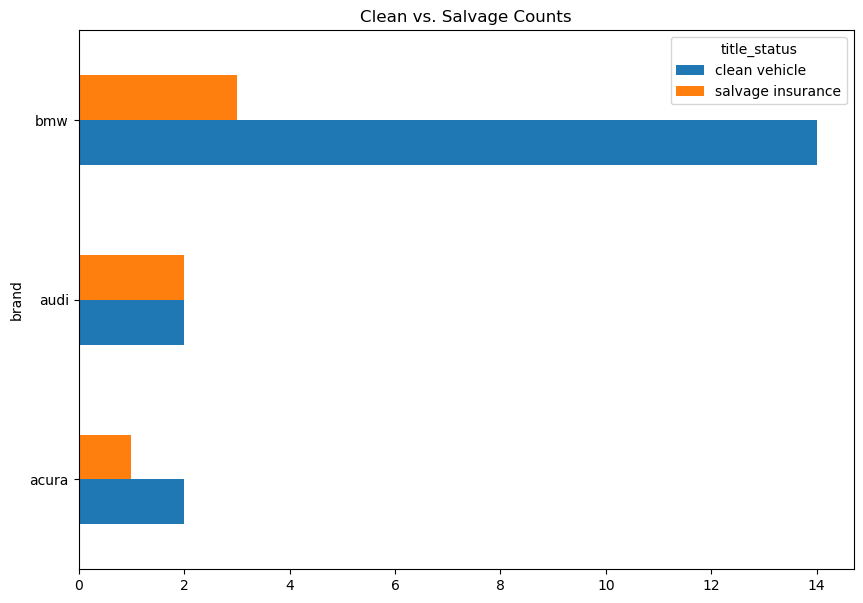

In [145]:
# на основе сводных таблиц можно строить графики
# например, можно посмотреть количество автомобилей (aggfunc = 'count')
# со статусом clean и salvage (title_status),
# сгруппированных по маркам (index)
pd.pivot_table(
    cars, index="brand", columns="title_status", values="price", aggfunc="count"
).round(2).head(3).plot.barh(figsize=(10, 7), title="Clean vs. Salvage Counts");

In [146]:
# метод .unstack() как бы убирает второе измерение
# по сути, мы также группируем данные по нескольким признакам, но только по
# строкам
pd.pivot_table(
    cars, index="brand", columns="title_status", values="price", aggfunc="median"
).round(2).head().unstack()

title_status       brand   
clean vehicle      acura       10400.0
                   audi        27950.0
                   bmw         31600.0
                   buick       20802.5
                   cadillac    24500.0
salvage insurance  acura        1000.0
                   audi           12.5
                   bmw          1825.0
                   buick           0.0
                   cadillac        0.0
dtype: float64

In [147]:
# создадим маску для автомобилей "БМВ" и сделаем копию датафрейма
bmw = cars[cars["brand"] == "bmw"].copy()
# установим новый индекс, удалив при этом старый
bmw.reset_index(drop=True, inplace=True)
# удалим столбец brand, так как у нас осталась только одна марка
bmw.drop(columns="brand", inplace=True)
# посмотрим на результат
bmw.head()

,price,model,year,title_status,mileage,color,state,country
0,29400,x3,2017,clean vehicle,23765.0,black,tennessee,usa
1,24500,door,2017,clean vehicle,17626.0,gray,michigan,usa
2,53500,m,2017,clean vehicle,29355.0,blue,michigan,usa
3,39000,series,2016,clean vehicle,39917.0,blue,michigan,usa
4,40000,series,2016,clean vehicle,31727.0,gray,michigan,usa


In [148]:
# сгруппируем данные по штату и году выпуска, передав их в параметр index
# и найдем медианну цену
pd.pivot_table(bmw, index=["state", "year"], values="price", aggfunc="median").round(2)

price
state      year         
california 2017  39800.0
           2020  61200.0
florida    2013   2925.0
georgia    2008   1825.0
illinois   2014  15000.0
michigan   2016  39000.0
           2017  39000.0
new jersey 2014  13500.0
tennessee  2017  29400.0
texas      2011   6200.0
           2016  29700.0
utah       2000      0.0
wisconsin  2017  26600.0

In [149]:
# когда группировка выполняется только по строкам,
# мы можем получить аналогичный результат с помощью метода .groupby()
bmw.groupby(by=["state", "year"])[["price"]].agg("median")

price
state      year         
california 2017  39800.0
           2020  61200.0
florida    2013   2925.0
georgia    2008   1825.0
illinois   2014  15000.0
michigan   2016  39000.0
           2017  39000.0
new jersey 2014  13500.0
tennessee  2017  29400.0
texas      2011   6200.0
           2016  29700.0
utah       2000      0.0
wisconsin  2017  26600.0

In [150]:
# метод .query() позволяет отфильтровать данные
pd.pivot_table(bmw, index=["state", "year"], values="price", aggfunc="median").round(
    2
).query("price > 20000")

price
state      year         
california 2017  39800.0
           2020  61200.0
michigan   2016  39000.0
           2017  39000.0
tennessee  2017  29400.0
texas      2016  29700.0
wisconsin  2017  26600.0

In [151]:
# применим метод .style.bar() и создадим встроенную горизонтальную столбчатую
# диаграмму
# цвет в параметр color можно, в частности, передавать в hex-формате
pd.pivot_table(bmw, index=["state", "year"], values="price", aggfunc="median").round(
    2
).style.bar(color="#d65f5f")